In [2]:
import pandas as pd

In [9]:
data = pd.read_csv(r'C:\Users\HwijunKwon\Downloads\RecipeData.csv')
toy = pd.read_csv(r'C:\Users\HwijunKwon\inisw\recipe\models\data\toy.csv')

In [47]:
toy

,recipe_title,recipe_ingredients,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,...,unit17,ingredient18,quantity18,unit18,ingredient19,quantity19,unit19,ingredient20,quantity20,unit20
0,비빔밥재료 애호박나물 애호박볶음 아삭거리게 볶는 방법,"{'재료': ['애호박1개', '다진마늘0.5큰술', '소금0.5큰술', '참기름1...",애호박,1,개,다진마늘,0.5,큰술,소금,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[마늘종볶음]단짠단짠 자꾸만 손이가요~,"{'재료': ['건새우50g', '물1/4컵', '마늘종300g', '소금1/3큰술...",건새우,50,g,물,1/4,컵,마늘종,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,백종원의 부추 달걀 볶음,"{'재료': ['부추1줌', '달걀4개', '식용유2큰술', '밥2공기'], '양념...",부추,1,줌,달걀,4,개,식용유,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,간단하게 맛난 반찬 만들기 '베이컨 버섯볶음',"{'재료': ['베이컨5~6줄', '양파1/2개', '미니새송이버섯7개', '다진마...",베이컨,5~6,줄,양파,1/2,개,미니새송이버섯,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,고소하고 향긋한 깻잎들깨볶음,"{'재료': ['깻잎', '대파', '다진마늘1T', '국간장1T', '참기름1T'...",깻잎,NaN,NaN,대파,NaN,NaN,다진마늘,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,밑반찬으로 딱이야~견과류멸치볶음!,"{'재료': ['잔멸치200g', '호두50g', '호박씨30g', '슬라이드아몬드...",잔멸치,200,g,호두,50,g,호박씨,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,"마늘쫑볶음, 간장조림으로 간이 쏙배고 맛있는 최애반찬","{'재료': ['마늘쫑1단', '간장60ml', '조청4T', '황설탕1T', '현...",마늘쫑,1,단,간장,60,ml,조청,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,밥도둑 새우호박볶음,"{'재료': ['호박1개', '양파1개', '새우살1줌', '마늘3알'], '양념'...",호박,1,개,양파,1,개,새우살,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,멸치마늘볶음,"{'재료': ['중멸치100g', '마늘15쪽'], '양념': ['양조간장1작은술'...",중멸치,100,g,마늘,15,쪽,양조간장,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ingredient_columns = toy.filter(like='ingredient').drop(columns=['recipe_ingredients']) # 'ingredient'가 포함된 모든 열 선택
all_ingredients = [item for sublist in ingredient_columns.values for item in sublist if pd.notna(item)] # 각 행의 ingredient 값을 하나의 리스트로 결합

len(set(all_ingredients)) #864개의 식재료


864

In [48]:
all_ingredients = set()
for i in range(1, 21):  
    all_ingredients.update(x[f'ingredient{i}'].dropna().unique())

recipe_ingredients_df = pd.DataFrame(columns=list(all_ingredients))

In [55]:
from fractions import Fraction

def convert_fraction_to_float(quantity):
    try:
        return float(Fraction(quantity))
    except ValueError:
        return None 

In [53]:
def convert_unit_to_number(unit):
    unit_conversion = {
        'g': 1,
        '개': 100,
    }
    return unit_conversion.get(unit, 1)

In [56]:
recipe_rows = []
for idx, row in toy.iterrows():
    recipe_data = {ingredient: 0.0 for ingredient in all_ingredients}  # 모든 식재료를 None으로 초기화
    for i in range(1, 21):  
        ingredient = row[f'ingredient{i}']
        quantity = row[f'quantity{i}']
        unit = row[f'unit{i}']
        if pd.notna(ingredient) and pd.notna(quantity):
            quantity_float = convert_fraction_to_float(quantity)
            if quantity_float is not None:
                unit_number = convert_unit_to_number(unit) if pd.notna(unit) else 1
                recipe_data[ingredient] = quantity_float * unit_number
    recipe_rows.append(recipe_data)

# 새로운 데이터프레임 생성 (모든 식재료를 열로 가짐)
recipe_ingredients_df = pd.concat([pd.DataFrame([row]) for row in recipe_rows], ignore_index=True)

# 결과 확인
print(recipe_ingredients_df.head())

   스리라차소스   무청    양파  게맛살   미향  사각어묵   어묵  소세지  청양초  콩나물  ...   당근  손질한가지  \
0     0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
1     0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
2     0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
3     0.0  0.0  50.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   
4     0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0   

   다진대파약간  당근조금  돼지고기목살슬라이스  흑후추조금  고운소금  매실액약간   소주  해바라기씨적당량  
0     0.0   0.0         0.0    0.0   0.0    0.0  0.0       0.0  
1     0.0   0.0         0.0    0.0   0.0    0.0  0.0       0.0  
2     0.0   0.0         0.0    0.0   0.0    0.0  0.0       0.0  
3     0.0   0.0         0.0    0.0   0.0    0.0  0.0       0.0  
4     0.0   0.0         0.0    0.0   0.0    0.0  0.0       0.0  

[5 rows x 864 columns]


In [67]:
data = recipe_ingredients_df.astype('float64')

In [69]:
import numpy as np

a, b, c= np.linalg.svd(data, full_matrices= True)

array([[-2.01518518e-05,  6.85356187e-06, -1.37578750e-05, ...,
         2.11353775e-05, -7.17906235e-05,  9.39470843e-06],
       [-1.72592288e-06,  1.17551077e-06, -4.52267835e-06, ...,
        -5.62688852e-05, -8.62606585e-05, -1.86886694e-04],
       [-8.14886983e-07,  3.90787778e-07, -2.67610094e-06, ...,
         3.01047307e-05,  1.61227942e-04, -1.25441327e-05],
       ...,
       [-3.21350457e-04,  5.44830606e-04, -5.93557964e-04, ...,
         1.86470476e-05,  2.40851053e-04, -2.17493083e-05],
       [-1.07366898e-04,  6.52368577e-05, -1.26752401e-03, ...,
         4.17094862e-04,  9.00154041e-06,  4.08920115e-05],
       [-6.39112868e-07,  2.92483979e-06, -5.15072393e-05, ...,
         9.23576423e-04,  1.72957567e-04,  2.42643729e-04]])

In [76]:
result = a[:, :100].dot(np.diag(b[:100]))

In [82]:
result2 = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0)) # 정규화 해줘야 함



C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_10564\928630014.py:1: RuntimeWarning: invalid value encountered in divide
  result2 = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0)) # 정규화 해줘야 함


In [86]:
toy.iloc[2, :]

recipe_title                                              백종원의 부추 달걀 볶음
recipe_ingredients    {'재료': ['부추1줌', '달걀4개', '식용유2큰술', '밥2공기'], '양념...
ingredient1                                                          부추
quantity1                                                             1
unit1                                                                 줌
                                            ...                        
quantity19                                                          NaN
unit19                                                              NaN
ingredient20                                                        NaN
quantity20                                                          NaN
unit20                                                              NaN
Name: 2, Length: 62, dtype: object

In [85]:
toy.iloc[233, :]

recipe_title                                                 애호박 새우젓 볶음
recipe_ingredients    {'재료': ['애호박', '마늘', '양파', '대파'], '양념': ['고춧가루...
ingredient1                                                         애호박
quantity1                                                           NaN
unit1                                                               NaN
                                            ...                        
quantity19                                                          NaN
unit19                                                              NaN
ingredient20                                                        NaN
quantity20                                                          NaN
unit20                                                              NaN
Name: 233, Length: 62, dtype: object

In [83]:
result2[2].argsort()

array([233, 385,  28, 137, 130, 112, 566, 228, 683, 631, 804, 304, 889,
       852, 144, 860, 892, 520, 858, 887, 240, 786, 744, 328, 134, 258,
       788, 914, 277,  10, 402, 913, 446, 256, 225, 754,  51, 981, 807,
       907, 506, 284, 460, 820,  85, 996, 692, 320, 826,  23, 293, 493,
       418, 567,  29,  34,  99, 174, 432, 526, 548, 337, 166, 640, 919,
        36, 296, 800, 298, 601, 661, 515, 672, 979, 403, 865, 307, 406,
       674, 736, 483, 606,  27, 591, 218, 603, 910, 143, 669, 954, 639,
       876, 957, 861,  86, 482, 810, 908, 480, 975, 552, 388, 339, 254,
       410, 458, 325, 821, 670, 395,  50,  73, 967, 972,  91, 109, 165,
        56, 762, 646, 537, 152, 380, 585, 624, 682, 763,  37, 286, 349,
       790, 445, 665, 974, 774, 127, 401, 594, 252,  54, 579, 309, 502,
       888, 161, 189, 297, 776, 326, 799, 313, 997, 117, 733, 138, 352,
       455, 950, 287, 456, 756, 362,  26, 615,  13, 961, 463, 191, 368,
       121,  30, 350,  84, 568, 833, 946, 983, 634, 731, 745, 34

In [88]:
result = np.diag(b[:100]).dot(c[:100]).T

In [89]:
result_c = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0))

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_10564\226570040.py:1: RuntimeWarning: invalid value encountered in divide
  result_c = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0))


In [95]:
list(recipe_ingredients_df.columns)[2]

'양파'

In [107]:
list(recipe_ingredients_df.columns)[217]

'깨조금'

In [90]:
result_c[2].argsort()

array([227, 226, 217,  29,  10,  27, 196, 207,  83,  47,  49, 138,  20,
       177, 137,  60,  57,  89, 126,  93, 103,  70, 116, 119, 114,  95,
       136, 164,  42, 185, 147, 153, 179, 150, 162, 198, 788, 161, 528,
       121, 186,  73,  59,  30, 488, 519, 639, 486, 225, 284, 587, 411,
       776, 799, 608, 598, 109, 679, 281, 634,  68,  38, 365, 526,  74,
       117, 310, 588, 182, 462, 490,  46, 401, 826, 276, 237, 274, 653,
       684,  18, 102, 134, 286, 730, 106, 430, 853, 533, 278, 705, 443,
        96, 320, 792, 701,  22, 796, 575, 249, 341, 668, 724, 368, 381,
       447, 130, 262, 318, 518, 571, 184, 839, 247,  79, 770, 364, 584,
       408, 562, 579, 442, 793, 852,  86, 149, 350, 667, 638, 714, 560,
       230, 475, 473, 718, 459, 550, 811, 585, 708, 206, 497, 741, 152,
       204, 292, 374, 557, 496, 516, 189, 795, 637, 200, 603, 747, 455,
       858, 821,  76, 521,  21, 244, 141, 337,  43, 651, 845, 202, 656,
       831, 732, 686, 183,  97, 748, 702,  67, 536, 440, 168, 73

In [99]:
result = a[:, :2].dot(np.diag(b[:2]))

In [103]:
result 

array([[-1.12281872e-01,  2.77870316e-02],
       [-9.61647860e-03,  4.76598236e-03],
       [-4.54037855e-03,  1.58440713e-03],
       ...,
       [-1.79049703e+00,  2.20895726e+00],
       [-5.98225730e-01,  2.64495843e-01],
       [-3.56100223e-03,  1.18584492e-02]])

In [106]:
result

array([[-1.12281872e-01,  2.77870316e-02],
       [-9.61647860e-03,  4.76598236e-03],
       [-4.54037855e-03,  1.58440713e-03],
       ...,
       [-1.79049703e+00,  2.20895726e+00],
       [-5.98225730e-01,  2.64495843e-01],
       [-3.56100223e-03,  1.18584492e-02]])

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_10564\1422094236.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(result[:, 0]), np.log(result[:, 1]))
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_10564\1422094236.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(result[:, 0]), np.log(result[:, 1]))


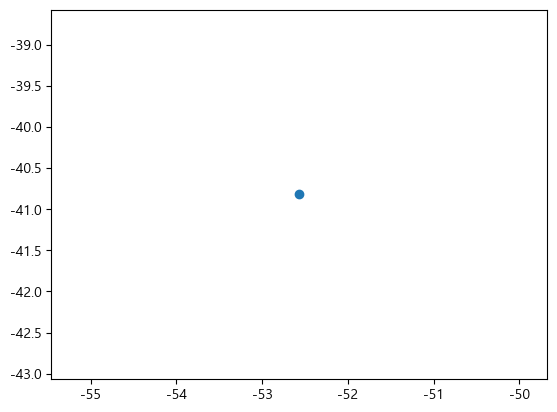

In [105]:
import matplotlib.pyplot as plt

plt.scatter(np.log(result[:, 0]), np.log(result[:, 1]))

#싸이킷런, 정규화, 